pyVBRc : [INFO ] 2023-07-26 11:42:42,011:  /home/chris/src/vbr_related/pyVBRc/pyVBRc/sample_data/VBRc_sample_LUT.mat loaded.


input state variables have shape (10, 10, 5)


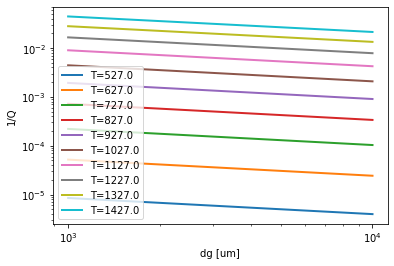

In [1]:
import matplotlib.pyplot as plt

from pyVBRc.sample_data import get_sample_filename
from pyVBRc.vbrc_structure import VBRCstruct

file = get_sample_filename("VBRc_sample_LUT.mat")
vbr = VBRCstruct(file, lut_dimensions=["T_K", "phi", "dg_um"])

input_shape = vbr.input.SV.T_K.shape
print(f"input state variables have shape {input_shape}")


nT = input_shape[0]
ig = 0  # grain size index to use
phi = vbr.input.SV.phi[0, :, 0]
dg = vbr.input.SV.dg_um[0, 0, :]
T_C = vbr.input.SV.T_K[:, 0, 0] - 273.0
ifreq = 0  # frequency index to use

for iT in range(nT):
    Qinv = vbr.output.anelastic.andrade_psp.Qinv[iT, 0, :, 0]  # extra dim for frequency
    plt.loglog(dg, Qinv, label=f"T={T_C[iT]}", linewidth=2)
plt.xlabel("dg [um]")
plt.ylabel("1/Q")
plt.legend()
plt.show()
